In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv("HousePricePrediction.xlsx - Sheet1.csv")
df

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [4]:
df.head(5)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [5]:
df.shape

(2919, 13)

In [6]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))


Categorical variables: 4
Integer variables: 0
Float variables: 3


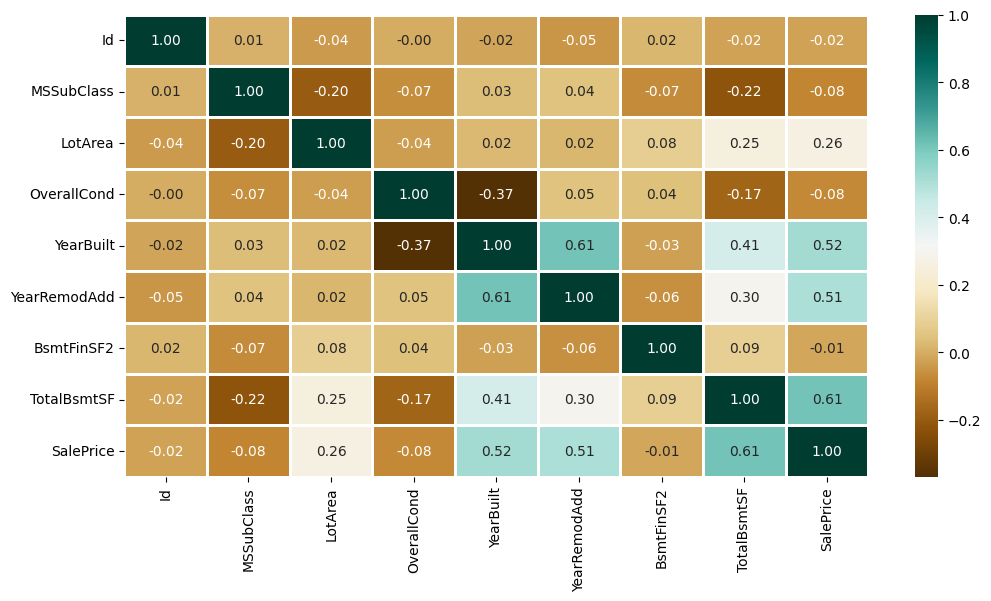

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("HousePricePrediction.xlsx - Sheet1.csv")

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), cmap='BrBG', fmt='.2f', linewidths=2, annot=True)
plt.show()



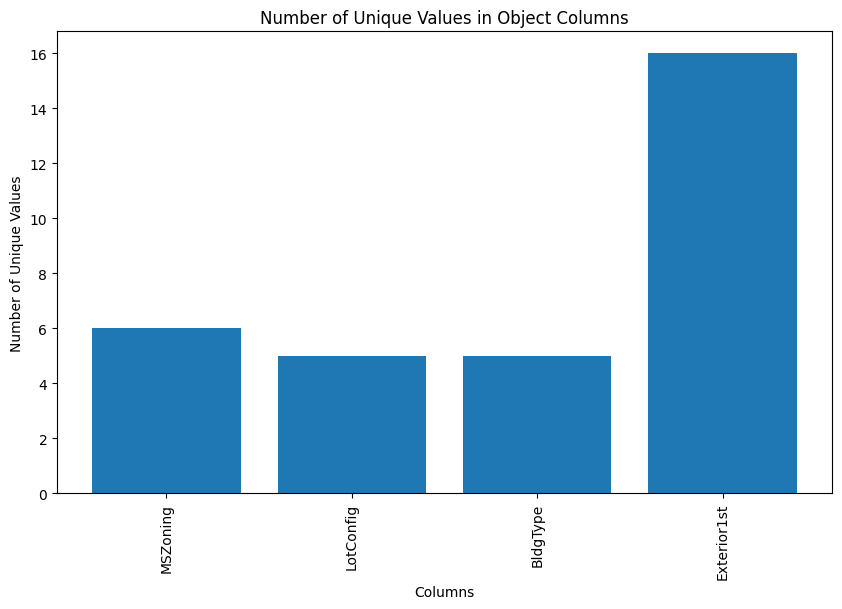

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
#df = pd.read_csv("HousePricePrediction.xlsx - Sheet1.csv")

# Define object_cols to include only object type columns
#object_cols = df.select_dtypes(include='object').columns

# Initialize an empty list to store unique values count
unique_values = []

# Loop through each object column to get the unique values count
for col in object_cols:
    unique_values.append(df[col].unique().size)

# Plot the unique values count
plt.figure(figsize=(10, 6))
plt.bar(object_cols, unique_values)
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.title('Number of Unique Values in Object Columns')
plt.xticks(rotation=90)
plt.show()



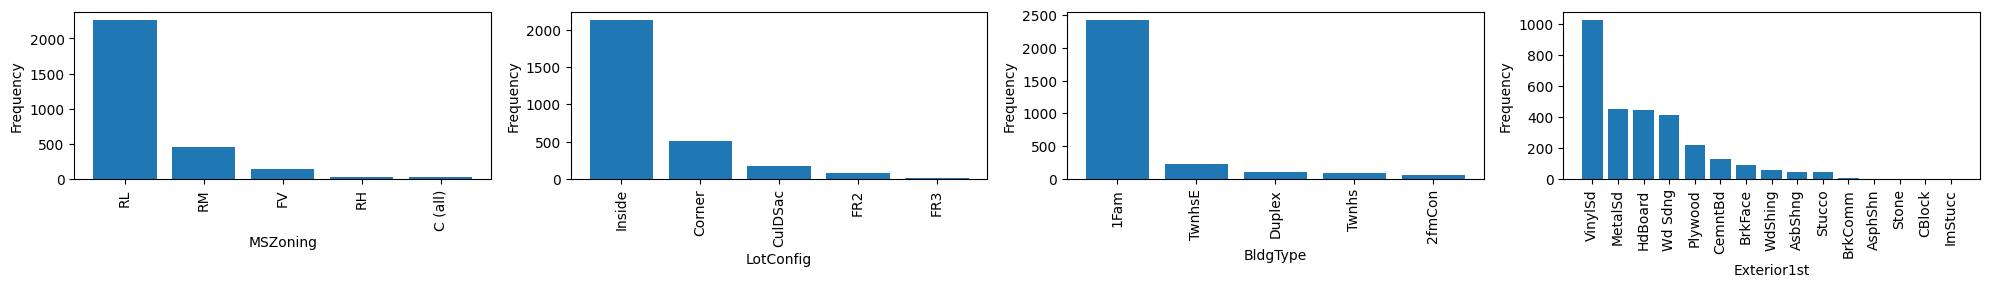

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("HousePricePrediction.xlsx - Sheet1.csv")

# Define object_cols to include only object type columns
object_cols = df.select_dtypes(include='object').columns
plt.figure(figsize=(20, 30))
index = 1
for col in object_cols:
    y = df[col].value_counts()
    plt.subplot(11, 4, index)
    plt.bar(y.index, y.values)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    index += 1

plt.tight_layout()
plt.show()


In [10]:
df.drop(['Id'],
			axis=1,
			inplace=True)


In [11]:
df['SalePrice'] = df['SalePrice'].fillna(
df['SalePrice'].mean())


In [12]:
#import pandas as pd
new_df = df.dropna()


In [13]:
new_df.isnull().sum()


MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [14]:
from sklearn.preprocessing import OneHotEncoder

s = (new_df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
	len(object_cols))


Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [18]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Initialize the OneHotEncoder with sparse_output set to False
OH_encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the categorical columns
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_df[object_cols]))

# Set the index to match the original DataFrame
OH_cols.index = new_df.index
OH_cols.columns = OH_encoder.get_feature_names_out(input_features=object_cols)

# Drop the original categorical columns and concatenate the one-hot encoded columns
df_final = new_df.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)


In [19]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into 
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
	X, Y, train_size=0.8, test_size=0.2, random_state=0)


In [20]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.1870512931870423


In [21]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)


0.19093404007980055

In [22]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.1874168384159988


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

# Assuming `df` is your DataFrame and 'target' is the column to predict
# Replace 'target' with the actual name of your target column
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the CatBoostRegressor
cb_model = CatBoostRegressor()

# Fit the model on the training data
cb_model.fit(X_train, y_train)

# Predict on the validation set
preds = cb_model.predict(X_valid)

# Evaluate the model using R-squared score
cb_r2_score = r2_score(y_valid, preds)
print("R2 Score:", cb_r2_score)


NameError: name 'df' is not defined